In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("kernel_invocations.csv")
df.head()

,kernel_name,duration_ns,start_ns,end_ns
0,void at::native::<unnamed>::distribution_eleme...,22847,3275565090,3275587937
1,void at::native::<unnamed>::distribution_eleme...,22784,3280768436,3280791220
2,sm90_xmma_gemm_bf16bf16_bf16f32_f32_nn_n_tiles...,43008,3504329836,3504372844
3,sm90_xmma_gemm_bf16bf16_bf16f32_f32_nn_n_tiles...,44223,3522408416,3522452639
4,void at::native::vectorized_elementwise_kernel...,12032,3535301760,3535313792


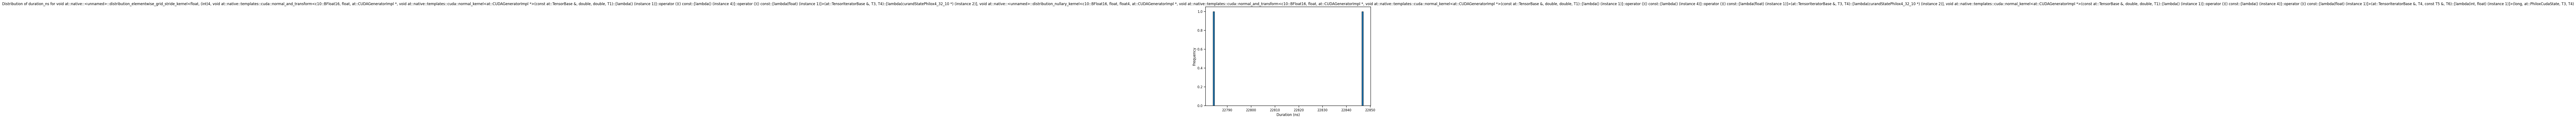

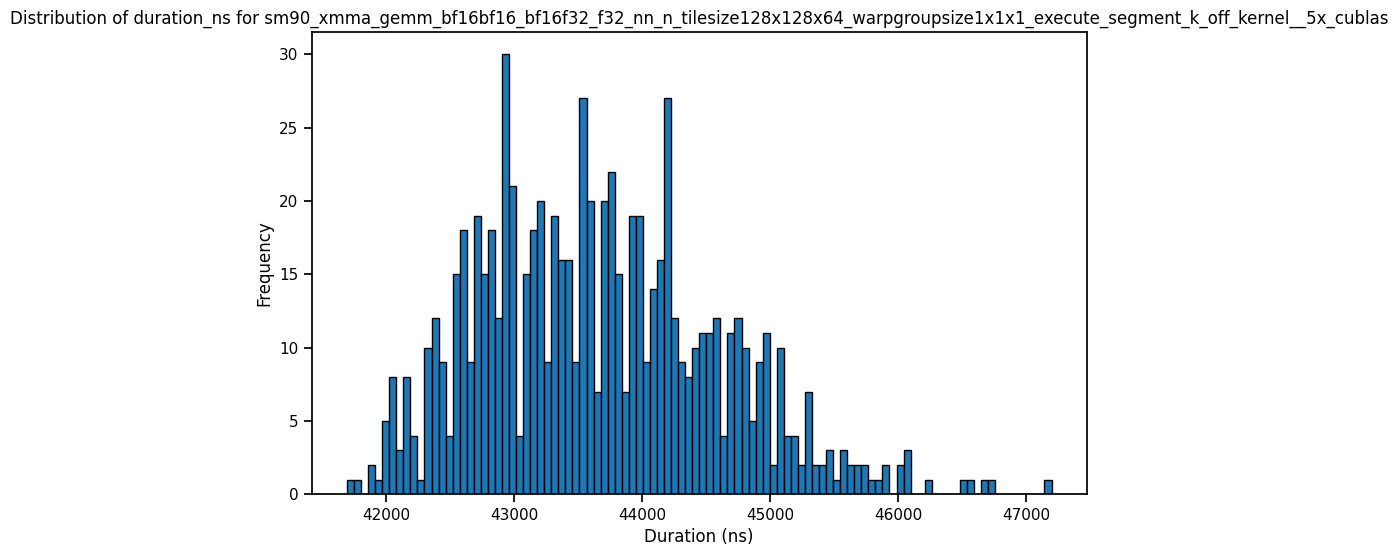

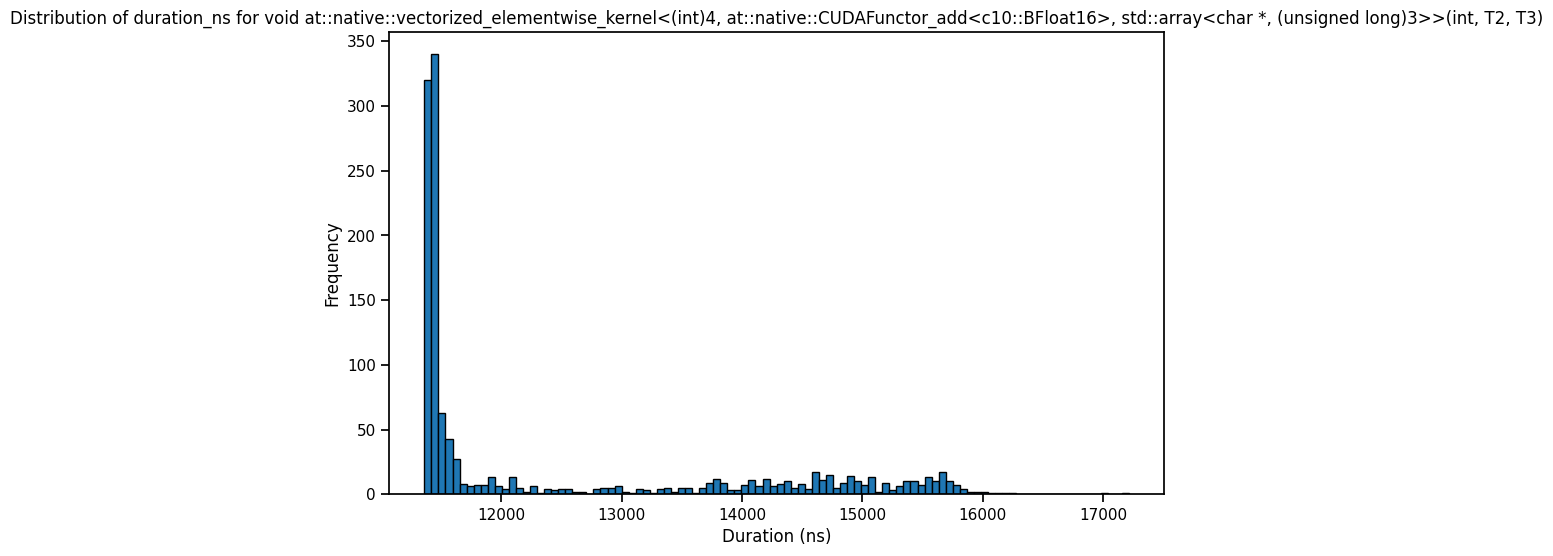

In [ ]:
# plot the distribution of duration_ns for each kernel

for kernel in df["kernel_name"].unique():
    plt.figure(figsize=(10, 6))
    plt.hist(df[df["kernel_name"] == kernel]["duration_ns"],
             bins=100,
             edgecolor="black")
    plt.title(f"Distribution of duration_ns for {kernel}")
    plt.xlabel("Duration (ns)")
    plt.ylabel("Frequency")
    plt.show()